In [18]:
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import arff
import pandas as pd

# Load ARFF
with open(r"../data/adult_income.arff") as f:
    dataset = arff.load(f)

# Convert to DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Save as CSV (optional)
df.to_csv("adult_income.csv", index=False)


In [9]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe(include='all'))

# Check target distribution
print(df.columns.tolist())


(1664500, 12)
   AGEP  COW  SCHL  MAR    OCCP  POBP  RELP  WKHP  SEX  RAC1P   ST    PINCP
0  18.0  1.0  18.0  5.0  4720.0  13.0  17.0  21.0  2.0    2.0  1.0   1600.0
1  53.0  5.0  17.0  5.0  3605.0  18.0  16.0  40.0  1.0    1.0  1.0  10000.0
2  41.0  1.0  16.0  5.0  7330.0   1.0  17.0  40.0  1.0    1.0  1.0  24000.0
3  18.0  6.0  18.0  5.0  2722.0   1.0  17.0   2.0  2.0    1.0  1.0    180.0
4  21.0  5.0  19.0  5.0  3870.0  12.0  17.0  50.0  1.0    1.0  1.0  29000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664500 entries, 0 to 1664499
Data columns (total 12 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   AGEP    1664500 non-null  float64
 1   COW     1664500 non-null  float64
 2   SCHL    1664500 non-null  float64
 3   MAR     1664500 non-null  float64
 4   OCCP    1664500 non-null  float64
 5   POBP    1664500 non-null  float64
 6   RELP    1664500 non-null  float64
 7   WKHP    1664500 non-null  float64
 8   SEX     1664500 non-nu

In [10]:
df

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,ST,PINCP
0,18.0,1.0,18.0,5.0,4720.0,13.0,17.0,21.0,2.0,2.0,1.0,1600.0
1,53.0,5.0,17.0,5.0,3605.0,18.0,16.0,40.0,1.0,1.0,1.0,10000.0
2,41.0,1.0,16.0,5.0,7330.0,1.0,17.0,40.0,1.0,1.0,1.0,24000.0
3,18.0,6.0,18.0,5.0,2722.0,1.0,17.0,2.0,2.0,1.0,1.0,180.0
4,21.0,5.0,19.0,5.0,3870.0,12.0,17.0,50.0,1.0,1.0,1.0,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1664495,39.0,6.0,16.0,5.0,6260.0,72.0,0.0,20.0,1.0,1.0,72.0,9600.0
1664496,38.0,6.0,14.0,5.0,4251.0,72.0,0.0,32.0,1.0,8.0,72.0,2400.0
1664497,37.0,1.0,19.0,3.0,7750.0,17.0,13.0,40.0,2.0,9.0,72.0,19700.0
1664498,47.0,1.0,16.0,1.0,8990.0,72.0,1.0,40.0,1.0,8.0,72.0,18700.0


In [11]:
df = df[df['PINCP'].notna()]  # Drop missing incomes if needed

# Create binary target: 1 if income > 50K, else 0
df['incg50'] = (df['PINCP'] > 50000).astype(int)
target_col = 'incg50'


In [14]:
X = df.drop(columns=['incg50', 'PINCP'])  
y = df['incg50']

# Identify types
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include='number').columns.tolist()
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Build pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train and evaluate
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    210374
           1       0.76      0.72      0.74    122526

    accuracy                           0.81    332900
   macro avg       0.80      0.79      0.79    332900
weighted avg       0.81      0.81      0.81    332900



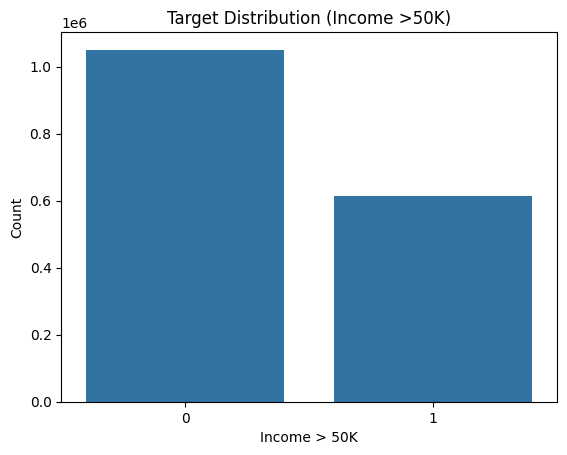

In [19]:


sns.countplot(x=y)
plt.title("Target Distribution (Income >50K)")
plt.xlabel("Income > 50K")
plt.ylabel("Count")
plt.show()


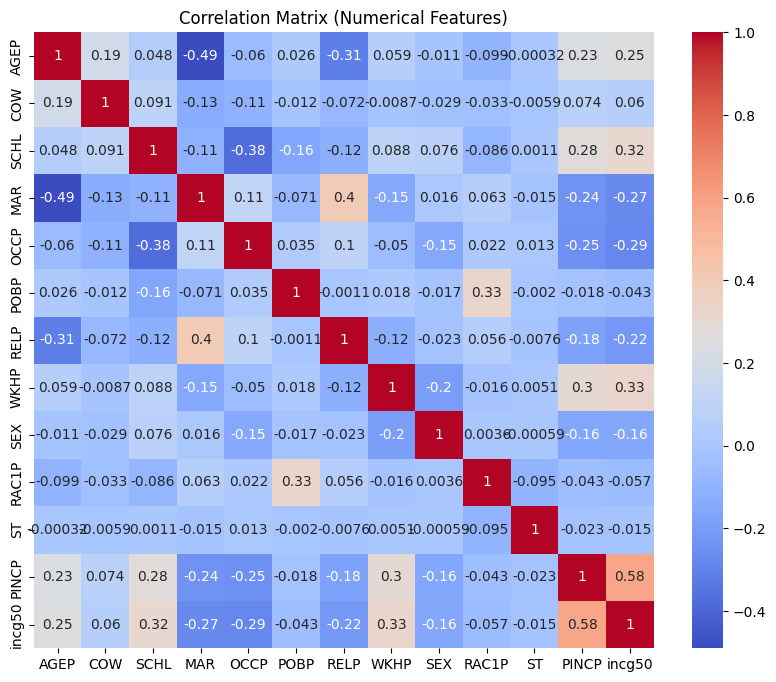

In [20]:
import numpy as np

corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Features)")
plt.show()


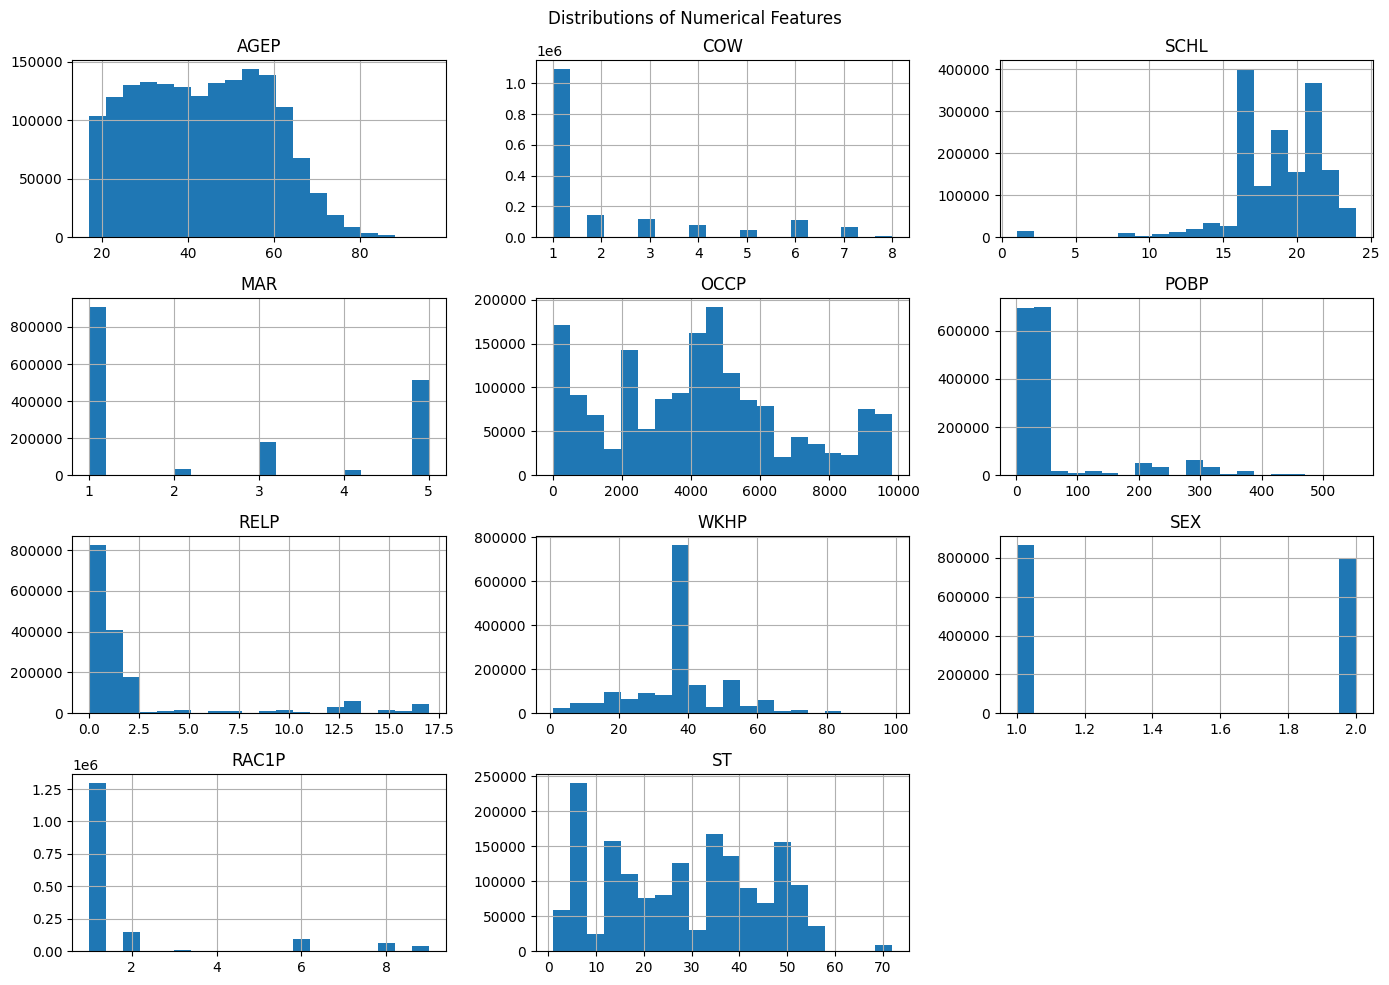

In [21]:
df[numerical_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle("Distributions of Numerical Features")
plt.tight_layout()
plt.show()
